In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dataset=pd.read_csv('iris.csv')

In [3]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
x=dataset.iloc[:,[1,2,3,4]].values

In [9]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=200,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\sevval\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


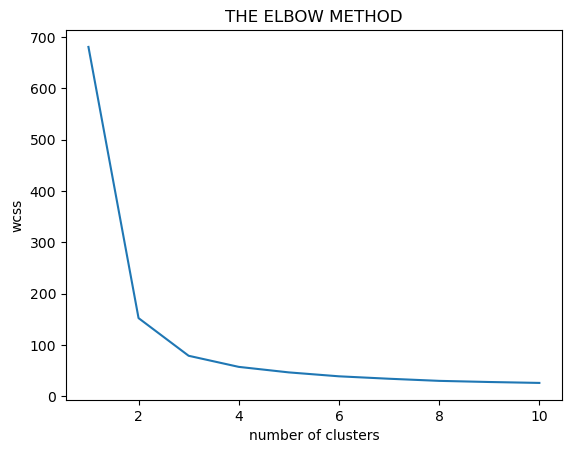

In [10]:
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

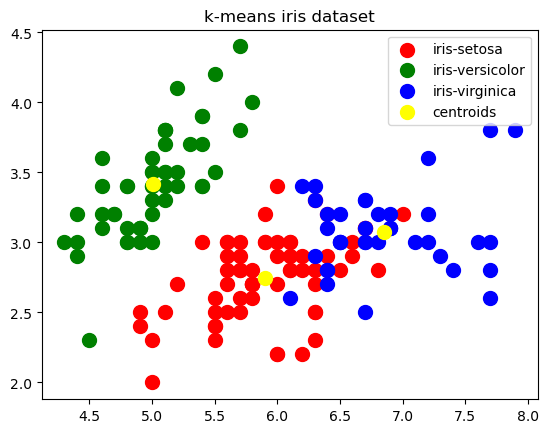

In [12]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s=100,c='red',label='iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=100,c='green',label='iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s=100,c='blue',label='iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.title('k-means iris dataset')

plt.legend()